In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# paths to training and test directories
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Set image dimensions and batch size
img_height, img_width = 299, 299  # Input size for InceptionV3
batch_size = 32

# Create data generators 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and test data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary' 
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Model Building (using InceptionV3)

# Load pre-trained InceptionV3 model without the top (classification) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers 
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D()) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

# Compilation and Training

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs=20, 
    validation_data=test_generator,
    validation_steps = test_generator.samples // batch_size
)


loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

Found 1725 images belonging to 2 classes.
Found 432 images belonging to 2 classes.
Epoch 1/20


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 489s 8s/step - accuracy: 0.8999 - loss: 0.2439 - val_accuracy: 0.9976 - val_loss: 0.0222
Epoch 2/20
 1/53 ━━━━━━━━━━━━━━━━━━━━ 4:30 5s/step - accuracy: 0.9688 - loss: 0.0594

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9688 - loss: 0.0594 - val_accuracy: 0.9375 - val_loss: 0.0667
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 422s 7s/step - accuracy: 0.9941 - loss: 0.0335 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 1.0000 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 410s 7s/step - accuracy: 0.9888 - loss: 0.0335 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 423s 7s/step - accuracy: 0.9932 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 395s 7s/step - accuracy: 0.9906 - loss: 0.0274 - val_accuracy: 1.0000 - val_loss: 0

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "inception_v3" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(1, 229, 229, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 229, 229, 3), dtype=float32)
  • training=False
  • mask=None

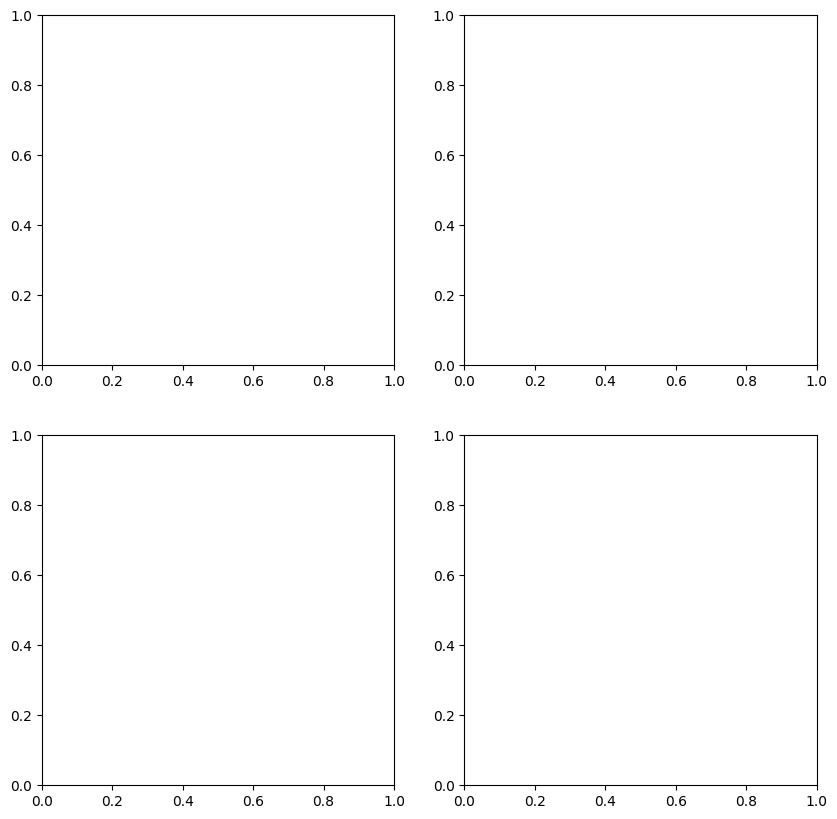

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def process_and_predict(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(229, 229))  
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]

    return img, predicted_class_label

image_paths = [
    r"E:\leaf1.jpg",
    r"E:\leaf2.jpg",
    r"E:\leaf3.jpg",
    r"E:\leaf4.jpg"
]
class_labels = train_generator.class_indices 

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, image_path in enumerate(image_paths):
    img, predicted_class_label = process_and_predict(image_path, model, class_labels)
    
    ax = axes[i // 2, i % 2]

    ax.imshow(img)
    ax.set_title(f"Predicted: {predicted_class_label}")
    ax.axis('off')  # Hide the axis labels

plt.tight_layout()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


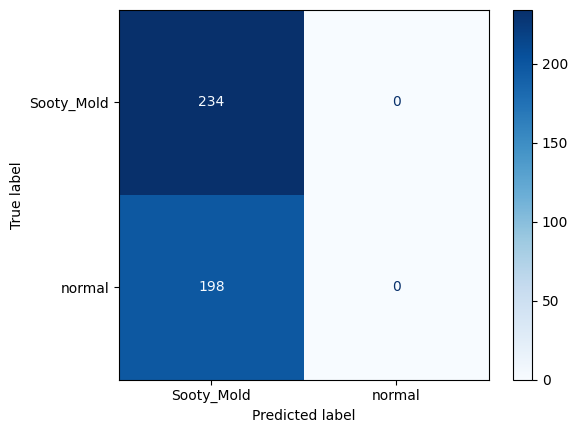

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

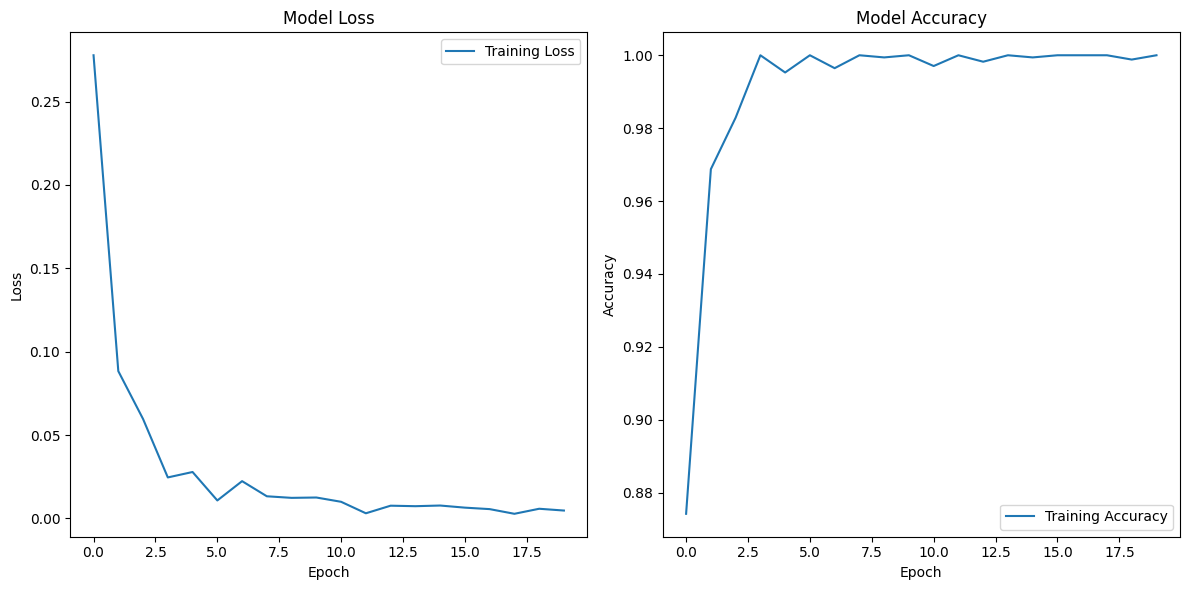

In [8]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

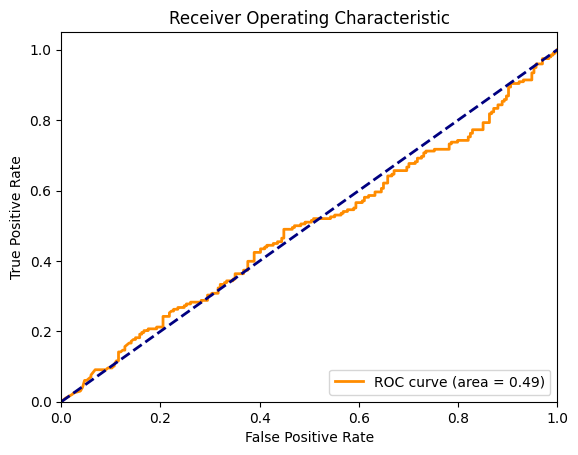

In [10]:
from sklearn.metrics import roc_curve, auc

# Assuming binary classification, so we only need the probabilities for the positive class
y_pred_prob = y_pred[:, -1]  # Probability of the second class (assuming positive class)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,589,989 (86.17 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 524,804 (2.00 MB)

In [ ]:
#K FOLD

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import os

# Paths to training and test directories
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Set image dimensions and batch size
img_height, img_width = 299, 299  # Input size for InceptionV3
batch_size = 32
num_folds = 5  # Number of folds for k-fold cross-validation

# Create a DataFrame with file paths and corresponding labels for k-fold splitting
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # For consistent data during KFold splitting
)

# Get file paths and labels
filenames = train_generator.filenames
labels = train_generator.classes
class_indices = train_generator.class_indices

# Create a DataFrame for filenames and labels
df = pd.DataFrame({
    'filename': [os.path.join(train_data_dir, f) for f in filenames],
    'label': labels
})

# Initialize KFold
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []

fold_no = 1

# Start K-fold Cross-Validation Loop
for train_index, val_index in kfold.split(df):
    print(f'Training fold {fold_no} ...')

    # Split the data for this fold
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]

    # Create data generators for this fold
    train_generator_fold = train_datagen.flow_from_dataframe(
        train_data,
        x_col='filename',
        y_col='label',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )

    val_generator_fold = train_datagen.flow_from_dataframe(
        val_data,
        x_col='filename',
        y_col='label',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )

    # Load pre-trained InceptionV3 model without the top layers
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Freeze the base model layers to prevent them from being updated during training
    for layer in base_model.layers:
        layer.trainable = False

    # Create a new model on top of the base model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())  # Reduce spatial dimensions
    model.add(Dense(128, activation='relu'))  # Dense layer for feature learning
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator_fold,
        steps_per_epoch=train_generator_fold.samples // batch_size,
        epochs=20,  # Adjust as needed
        validation_data=val_generator_fold,
        validation_steps=val_generator_fold.samples // batch_size
    )

    # Evaluate the model on the validation set
    scores = model.evaluate(val_generator_fold)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

# Print average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Found 1725 images belonging to 2 classes.
Training fold 1 ...


TypeError: If class_mode="binary", y_col="label" column values must be strings.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
y_col["label"]

In [ ]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming binary classification, so we only need the probabilities for the positive class
y_pred_prob = y_pred[:, 1]  # Probability of the second class (assuming positive class)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 50 EPOCHS

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# paths to training and test directories
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Set image dimensions and batch size
img_height, img_width = 299, 299  # Input size for InceptionV3
batch_size = 32

# Create data generators 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and test data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary' 
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Model Building (using InceptionV3)

# Load pre-trained InceptionV3 model without the top (classification) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers 
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D()) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

# Compilation and Training

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs=50, 
    validation_data=test_generator,
    validation_steps = test_generator.samples // batch_size
)


loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

Found 1725 images belonging to 2 classes.
Found 432 images belonging to 2 classes.
Epoch 1/50


E:\Programfiles\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.7633 - loss: 0.5583 - val_accuracy: 0.9856 - val_loss: 0.0697
Epoch 2/50
 1/53 ━━━━━━━━━━━━━━━━━━━━ 2:04 2s/step - accuracy: 1.0000 - loss: 0.0626

E:\Programfiles\ANACONDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 1.0000 - loss: 0.0626 - val_accuracy: 1.0000 - val_loss: 0.1006
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.9822 - loss: 0.0697 - val_accuracy: 0.9976 - val_loss: 0.0257
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 1.0000 - loss: 0.0240 - val_accuracy: 1.0000 - val_loss: 0.0425
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.9951 - loss: 0.0319 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9688 - loss: 0.0435 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 314s 6s/step - accuracy: 0.9939 - loss: 0.0246 - val_accuracy: 0.9952 - val_loss: 0.0135
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9688 - loss: 0.0292 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 9/50
12/53 ━━━━━━━━━━━━━━━━━━━━ 3:25 5s/step - accuracy: 1.0000 - loss: 0.0138

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def process_and_predict(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))  
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]

    return img, predicted_class_label

image_paths = [
    r"E:\leaf1.jpg",
    r"E:\leaf2.jpg",
    r"E:\leaf3.jpg",
    r"E:\leaf4.jpg"
]
class_labels = train_generator.class_indices 

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, image_path in enumerate(image_paths):
    img, predicted_class_label = process_and_predict(image_path, model, class_labels)
    
    ax = axes[i // 2, i % 2]

    ax.imshow(img)
    ax.set_title(f"Predicted: {predicted_class_label}")
    ax.axis('off')  # Hide the axis labels

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming binary classification, so we only need the probabilities for the positive class
y_pred_prob = y_pred[:, 1]  # Probability of the second class (assuming positive class)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import os

# Paths to training and test directories
train_data_dir = r"E:\Sooty_mold\train"
test_data_dir = r"E:\Sooty_mold\test"

# Set image dimensions and batch size
img_height, img_width = 299, 299  # Input size for InceptionV3
batch_size = 32
num_folds = 5  # Number of folds for k-fold cross-validation

# Create a DataFrame with file paths and corresponding labels for k-fold splitting
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # For consistent data during KFold splitting
)

# Get file paths and labels
filenames = train_generator.filenames
labels = train_generator.classes
class_indices = train_generator.class_indices

# Create a DataFrame for filenames and labels
df = pd.DataFrame({
    'filename': [os.path.join(train_data_dir, f) for f in filenames],
    'label': labels
})

# Initialize KFold
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []

fold_no = 1

# Start K-fold Cross-Validation Loop
for train_index, val_index in kfold.split(df):
    print(f'Training fold {fold_no} ...')

    # Split the data for this fold
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]

    # Create data generators for this fold
    train_generator_fold = train_datagen.flow_from_dataframe(
        train_data,
        x_col='filename',
        y_col='label',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )

    val_generator_fold = train_datagen.flow_from_dataframe(
        val_data,
        x_col='filename',
        y_col='label',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary'
    )

    # Load pre-trained InceptionV3 model without the top layers
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Freeze the base model layers to prevent them from being updated during training
    for layer in base_model.layers:
        layer.trainable = False

    # Create a new model on top of the base model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())  # Reduce spatial dimensions
    model.add(Dense(128, activation='relu'))  # Dense layer for feature learning
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator_fold,
        steps_per_epoch=train_generator_fold.samples // batch_size,
        epochs=50,  # Adjust as needed
        validation_data=val_generator_fold,
        validation_steps=val_generator_fold.samples // batch_size
    )

    # Evaluate the model on the validation set
    scores = model.evaluate(val_generator_fold)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1

# Print average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming binary classification, so we only need the probabilities for the positive class
y_pred_prob = y_pred[:, 1]  # Probability of the second class (assuming positive class)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()